## Day 34 Lecture 2 Assignment

In this assignment, we will learn about gradient boosting. We will use a dataset of house information in Ames, Iowa, predicting sale price.

In [40]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
house = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/houseprices.csv')
print(house.shape)
house.head()

(1460, 81)


,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,...,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Check for nulls. Remove any columns with more than 100 nulls, then drop any remaining rows with nulls after that.

In [42]:
# your work here
vals = missingness_summary(house)
drop = vals[vals.values > 100].keys()
house = house.drop(columns=drop)
house = house.dropna()

In [43]:
#A summary of missing variables represented as a percentage of the total missing content. 
def missingness_summary(df, print_log=False, sort='ascending', filter=0):
  s = df.isnull().sum()

  if sort.lower() == 'ascending':
    s = s.sort_values(ascending=True)
  elif sort.lower() == 'descending':
    s = s.sort_values(ascending=False)  
  if print_log: 
    print(s)
  
  return pd.Series(s)

One hot encode your categorical features using get_dummies.

In [44]:
# your work here
house = pd.get_dummies(house, drop_first=True)

In [45]:
house.describe()

,id,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice,mszoning_FV,mszoning_RH,mszoning_RL,...,electrical_SBrkr,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,functional_Maj2,functional_Min1,functional_Min2,functional_Mod,functional_Sev,functional_Typ,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagefinish_RFn,garagefinish_Unf,garagequal_Fa,garagequal_Gd,garagequal_Po,garagequal_TA,garagecond_Fa,garagecond_Gd,garagecond_Po,garagecond_TA,paveddrive_P,paveddrive_Y,saletype_CWD,saletype_Con,saletype_ConLD,saletype_ConLI,saletype_ConLw,saletype_New,saletype_Oth,saletype_WD,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,...,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,731.228700,56.136024,10706.294469,6.219731,5.596413,1973.029148,1985.668909,110.360239,464.234679,49.218236,582.494768,1095.947683,1176.221973,357.141256,4.221973,1537.585202,0.438714,0.060538,1.575486,0.402840,2.864723,1.029895,6.550075,0.648729,1978.596413,1.87145,501.449925,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,186761.782511,0.046338,0.008221,0.796712,...,0.928251,0.017190,0.424514,0.485800,0.002990,0.020927,0.022422,0.008221,0.000747,0.937220,0.636771,0.01420,0.063528,0.005232,0.275785,0.308670,0.433483,0.035874,0.010463,0.002242,0.949178,0.024664,0.006726,0.005232,0.961883,0.020179,0.939462,0.002990,0.001495,0.004484,0.002990,0.002990,0.087444,0.000747,0.865471,0.000747,0.005232,0.014948,0.825112,0.089686
std,421.779691,41.252576,10336.621126,1.324472,1.078124,29.563540,20.296463,185.604816,458.792420,166.196584,439.950528,405.554435,386.644986,440.324982,40.712916,520.579960,0.515630,0.241685,0.547570,0.504185,0.776677,0.174697,1.585071,0.645393,24.773741,0.63428,186.761863,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668,0.210294,0.090331,0.402596,...,0.258168,0.130027,0.494454,0.499985,0.054615,0.143193,0.148105,0.090331,0.027338,0.242658,0.481110,0.11836,0.244001,0.072168,0.447076,0.462117,0.495741,0.186047,0.101792,0.047316,0.219716,0.155156,0.081769,0.072168,0.191549,0.140666,0.238570,0.054615,0.038648,0.066840,0.054615,0.054615,0.282590,0.027338,0.341348,0.027338,0.072168,0.121389,0.380013,0.285838
min,1.000000,20.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.00000,160.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,35311.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,

Take a look at your outcome variable. It is highly skewed, and has a few very rare large outliers.

Let's try log transforming the y variable.

In [46]:
# your work here
y = house['saleprice']
y = np.log1p(y)


We know that there are some rare large values. We can make sure that the training and test sets have about the same distribution by stratifying the train-test split.

Split your training and test sets, with a test size of 0.2. Use the given helper function to stratify the continuous outcome. Remember that the outcome variable is now the **log of sale price**.

In [47]:
def binned(y, num_bins):
    # Creates an object to put in the stratify keyword in train_test_split
    # Specify number of bins to separate your y variable
    ymin, ymax = y.min(), y.max()
    bins = np.linspace(ymin, ymax, num_bins+1)[:-1]
    y_binned = np.digitize(y, bins)
    return y_binned

In [48]:
# your work here
from sklearn.model_selection import train_test_split, cross_val_score
X = house.drop(columns=['saleprice'])

#Size of the test set.
SIZE = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=SIZE, stratify=binned(y, 10))
print('There are {:d} training samples and {:d} test samples'.format(X_train.shape[0], X_test.shape[0]))

There are 1070 training samples and 268 test samples


Create a Gradient Boosting Regressor model. Measure the MAE (Mean Absolute Error) for the training and testing sets.

In [56]:
# your work here
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

gbr = GradientBoostingRegressor(learning_rate=0.8, max_depth=4, n_iter_no_change=10, n_estimators=10000)
gbr.fit(X_train, y_train)


pred_train = gbr.predict(X_train)
pred_test = gbr.predict(X_test)
print("train mae: {} test mae: {}".format(mean_absolute_error(y_train, pred_train), mean_absolute_error(y_test, pred_test)))


train mae: 0.04640579101252875 test mae: 0.11465233990610674


Create a grid search. Try varying subsample, learning rate, and max features. Use MAE as your scoring metric.

In [60]:
# your work here
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate':[0.8, 1, 0.2], 'subsample':[1, 0.5, 0.8, 0.2], 'max_features':['auto', 'sqrt', 'log2']}
result = GridSearchCV(gbr, parameters, scoring='neg_mean_absolute_error')
result.fit(X_train, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.8,
                                                 loss='ls', max_depth=4,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10000,
                                                 n_i...
                            

best parameters: {'learning_rate': 0.2, 'max_features': 'auto', 'subsample': 1}
best score:      0.09368 (+/-0.00845)
{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.2,
 'loss': 'ls',
 'max_depth': 4,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10000,
 'n_iter_no_change': 10,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_features,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
24,0.438307,0.129952,0.002234,0.000074,0.2,auto,1,"{'learning_rate': 0.2, 'max_features': 'auto',...",-0.096077,-0.106350,-0.097263,-0.082992,-0.085715,-0.093680,0.008447,1
26,0.450620,0.102649,0.002143,0.000241,0.2,auto,0.8,"{'learning_rate': 0.2, 'max_features': 'auto',...",-0.099712,-0.104387,-0.101006,-0.085698,-0.083487,-0.094858,0.008548,2
25,0.224555,0.067617,0.002331,0.000391,0.2,auto,0.5,"{'learning_rate': 0.2, 'max_features': 'auto',...",-0.096364,-0.105241,-0.102544,-0.086834,-0.092328,-0.096662,0.006688,3
28,0.057929,0.009089,0.002172,0.000101,0.2,sqrt,1,"{'learning_rate': 0.2, 'max_features': 'sqrt',...",-0.097168,-0.106804,-0.102992,-0.090762,-0.094481,-0.098441,0.005778,4
29,0.040960,0.005775,0.002204,0.000094,0.2,sqrt,0.5,"{'learning_rate': 0.2, 'max_features': 'sqrt',...",-0.100974,-0.106230,-0.105526,-0.091799,-0.088906,-0.098687,0.007099,5
34,0.048390,0.009748,0.002163,0.000116,0.2,log2,0.8,"{'learning_rate': 0.2, 'max_features': 'log2',...",-0.107453,-0.105142,-0.094934,-0.093503,-0.098273,-0.099861,0.005527,6
30,0.063402,0.024072,0.002227,0.000194,0.2,sqrt,0.8,"{'learning_rate': 0.2, 'max_features': 'sqrt',...",-0.108837,-0.102708,-0.100620,-0.091914,-0.103238,-0.101463,0.005495,7
32,0.058846,0.012379,0.002596,0.000586,0.2,log2,1,"{'learning_rate': 0.2, 'max_features': 'log2',...",-0.108010,-0.110524,-0.108249,-0.089371,-0.101380,-0.103507,0.007699,8
27,0.081194,0.022206,0.001992,0.000097,0.2,auto,0.2,"{'learning_rate': 0.2, 'max_features': 'auto',...",-0.108830,-0.114338,-0.103273,-0.095830,-0.100237,-0.104502,0.006487,9
31,0.028546,0.010657,0.002611,0.000831,0.2,sqrt,0.2,"{'learning_rate': 0.2, 'max_features': 'sqrt',...",-0.112615,-0.111115,-0.115789,-0.115253,-0.109020,-0.112758,0.002534,10


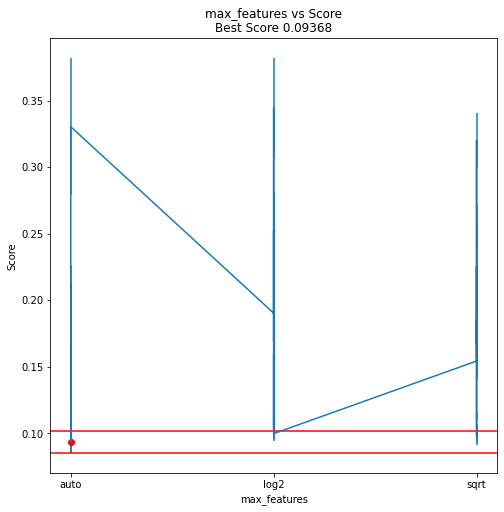

In [62]:
GridSearch_table_plot(result, 'max_features' )

In [59]:
def GridSearch_table_plot(grid_clf, param_name,
                          num_results=15,
                          negative=True,
                          graph=True,
                          display_all_params=True):

    '''Display grid search results

    Arguments
    ---------

    grid_clf           the estimator resulting from a grid search
                       for example: grid_clf = GridSearchCV( ...

    param_name         a string with the name of the parameter being tested

    num_results        an integer indicating the number of results to display
                       Default: 15

    negative           boolean: should the sign of the score be reversed?
                       scoring = 'neg_log_loss', for instance
                       Default: True

    graph              boolean: should a graph be produced?
                       non-numeric parameters (True/False, None) don't graph well
                       Default: True

    display_all_params boolean: should we print out all of the parameters, not just the ones searched for?
                       Default: True

    Usage
    -----

    GridSearch_table_plot(grid_clf, "min_samples_leaf")

                          '''
    from matplotlib      import pyplot as plt
    from IPython.display import display
    import pandas as pd

    clf = grid_clf.best_estimator_
    clf_params = grid_clf.best_params_
    if negative:
        clf_score = -grid_clf.best_score_
    else:
        clf_score = grid_clf.best_score_
    clf_stdev = grid_clf.cv_results_['std_test_score'][grid_clf.best_index_]
    cv_results = grid_clf.cv_results_

    print("best parameters: {}".format(clf_params))
    print("best score:      {:0.5f} (+/-{:0.5f})".format(clf_score, clf_stdev))
    if display_all_params:
        import pprint
        pprint.pprint(clf.get_params())

    # pick out the best results
    # =========================
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

    best_row = scores_df.iloc[0, :]
    if negative:
        best_mean = -best_row['mean_test_score']
    else:
        best_mean = best_row['mean_test_score']
    best_stdev = best_row['std_test_score']
    best_param = best_row['param_' + param_name]

    # display the top 'num_results' results
    # =====================================
    display(pd.DataFrame(cv_results) \
            .sort_values(by='rank_test_score').head(num_results))

    # plot the results
    # ================
    scores_df = scores_df.sort_values(by='param_' + param_name)

    if negative:
        means = -scores_df['mean_test_score']
    else:
        means = scores_df['mean_test_score']
    stds = scores_df['std_test_score']
    params = scores_df['param_' + param_name]

    # plot
    if graph:
        plt.figure(figsize=(8, 8))
        plt.errorbar(params, means, yerr=stds)

        plt.axhline(y=best_mean + best_stdev, color='red')
        plt.axhline(y=best_mean - best_stdev, color='red')
        plt.plot(best_param, best_mean, 'or')

        plt.title(param_name + " vs Score\nBest Score {:0.5f}".format(clf_score))
        plt.xlabel(param_name)
        plt.ylabel('Score')
        plt.show()

Create residual plots of the training and test sets and interpret your results.

In [74]:
pred_train = result.predict(X_train)
pred_test = result.predict(X_test)

In [75]:
# your work here
errs = pd.DataFrame({'prediction': pred_test, 'actual': y_test})
errs['err'] = pred_test - y_test
errs['err_size'] = abs(pred_test - y_test)
errs['isErr'] = np.where(errs['err_size'] > 0, 1, 0)
errs.head()

,prediction,actual,err,err_size,isErr
828,12.026457,12.128117,-0.101659,0.101659,1
223,12.080994,12.100162,-0.019168,0.019168,1
12,11.806465,11.877576,-0.071110,0.071110,1
212,12.063651,12.133507,-0.069856,0.069856,1
1027,12.645106,12.588194,0.056912,0.056912,1


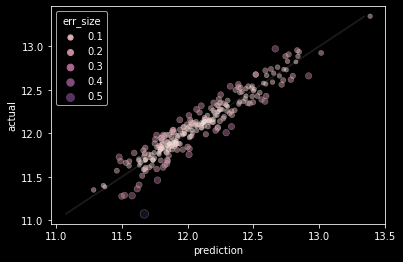

In [76]:
#Perfection!
plt.style.use(['dark_background'])
plt.plot(errs['actual'], errs['actual'], alpha=.1, color='#F9EDF5')
sns.scatterplot(data=errs, x='prediction', y='actual', hue='err_size', size='err_size', alpha=0.5)
plt.show()

In [77]:
# your work here
errs = pd.DataFrame({'prediction': pred_train, 'actual': y_train})
errs['err'] = pred_train - y_train
errs['err_size'] = abs(pred_train - y_train)
errs['isErr'] = np.where(errs['err_size'] > 0, 1, 0)
errs.head()

,prediction,actual,err,err_size,isErr
768,12.309355,12.286906,0.022449,0.022449,1
809,11.592586,11.571204,0.021382,0.021382,1
80,12.114957,12.173038,-0.058081,0.058081,1
867,11.827400,11.767575,0.059824,0.059824,1
566,12.704643,12.691584,0.013059,0.013059,1


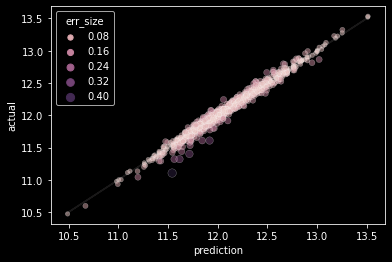

In [78]:
#Perfection!
plt.style.use(['dark_background'])
plt.plot(errs['actual'], errs['actual'], alpha=.1, color='#F9EDF5')
sns.scatterplot(data=errs, x='prediction', y='actual', hue='err_size', size='err_size', alpha=0.5)
plt.show()

It looks really pretty. I can't argue with this prediction model, I don't think. Can I? 

What's in this thing, anyway? I forgot. 

I do know that it can predict sales prices. Huh. Something to think about with regards to explanatory power. I suppose I could go back into the grid search and have a good look at what features it selected for me. 

Why would it be important for me to select and engineer the features? What's missing? Besides not really knowing how these features relate to each other, why those features were chosen and what steps one might take if one were say, a realtor, and wanted to work with a customer to increase their house value. 

Or someone looking to be a new homeowner and wanted to know exactly how much the cost of the house would be in the neighborhood their interested in. Moreover - what's the least costly homes available in X,Y neghborhoods.

Or better - which would/might be what this prediction model is good for: "I want a home with these features. How much will it cost me?"

I can predict the price, though and that was the goal. 

*It's almost time to turn my resid plot into a function. I'm still thinking about what err_size means. I might prefer to see the size of the datapoints. because I've adjusted the hue; I can see through these to determine if there's data hiding underneath; but if I increase the size - I might get a better idea of HOW MANY of them hit that point. . .*

*I'm overcomplicating. This looks fine to me and the size isn't really necessary, but keeps me balanced as I look at the graph.*